In [1]:
import numpy as np
from matplotlib import pyplot as plt
from statsmodels import stats
from statsmodels.stats.multitest import fdrcorrection
import pandas as pd
from skimage import measure

In [3]:
def cluster_wise_p_val_correction(p_arr, p_sig=0.05, num_permutations=100):
    
    labels, num_clusters = measure.label(p_arr<p_sig, return_num=True)
    
    # loop through clusters of p_val series or image
    index_cluster = {}
    p_cluster_sum = np.zeros(num_clusters)
    for cluster_i in range(num_clusters):
        index_cluster[cluster_i] = np.where(labels == cluster_i+1)[0] # first cluster is assigned to be 1 from measure.label
        p_cluster_sum[cluster_i] = np.sum(np.array(1-p_arr)[index_cluster[cluster_i]])
    p_min = np.max(p_cluster_sum) # p_min corresponds to the most unlikely cluster
    p_min_index = index_cluster[np.argmax(p_cluster_sum)]

    # loop through random permutation cycles
    r_per_arr = np.zeros(num_permutations)
    for r in range(num_permutations):
        r_per = np.random.randint(low=0, high=p_arr.shape[0], size=p_arr.shape[0])

        labels, num_clusters = measure.label(p_arr[r_per]<p_sig, return_num=True)

        index_cluster = {}
        p_cluster_sum = np.zeros(num_clusters)
        for cluster_i in range(num_clusters):
            index_cluster[cluster_i] = np.where(labels == cluster_i+1)[0] # first cluster is assigned to be 1 from measure.label
            p_cluster_sum[cluster_i] = np.sum(np.array(1-p_arr[r_per])[index_cluster[cluster_i]])
        r_per_arr[r] = np.max(p_cluster_sum) # corresponds to the most unlikely cluster
        
        sorted_r =  np.sort(r_per_arr)
        
    def find_arg_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx
    
    p = 1 - find_arg_nearest(sorted_r, p_min) / num_permutations
    
    return p, p_min_index

In [5]:
df_corrected = pd.read_csv("corrected_p_val_rho_ECOGSTN.csv")

cluster_wise_p_val_correction(df_corrected["p_ECOG"], p_sig=0.05, num_permutations=1000)

(0.0010000000000000009,
 array([29, 30, 31, 32, 33, 34, 35, 36, 37], dtype=int64))

In [2]:
df_corrected = pd.read_csv("corrected_p_val_rho_ECOGSTN.csv")

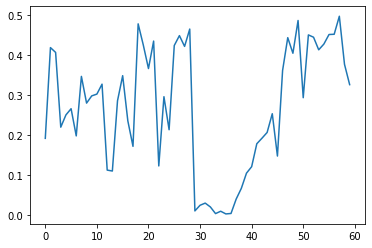

In [5]:
plt.plot(df_corrected["p_ECOG"])

In [24]:
p_sig = 0.05
p_arr = df_corrected["p_ECOG"]



In [41]:
p_min

8.853

In [57]:
r_per

array([23, 26, 20,  2, 22,  7, 57,  2, 13, 28, 46,  7,  1, 33, 20, 11, 21,
       58, 33, 53, 38, 36, 19, 17, 52, 47, 37, 54, 33, 58,  5,  1, 37, 26,
       12, 24, 44, 41, 21, 45, 29, 59, 48, 33, 31, 19, 11,  8, 39, 40, 59,
       34, 33, 22, 56, 51, 20,  7, 34,  7])

In [58]:
num_per = 10000
r_per_arr = np.zeros(num_per)

for r in range(num_per):
    r_per = np.random.randint(low=0, high=p_arr.shape[0], size=p_arr.shape[0])

    labels, num_clusters = measure.label(p_arr[r_per]<p_sig, return_num=True)

    index_cluster = {}
    p_cluster_sum = np.zeros(num_clusters)
    for cluster_i in range(num_clusters):
        index_cluster[cluster_i] = np.where(labels == cluster_i+1)[0] # first cluster is assigned to be 1 from measure.label
        p_cluster_sum[cluster_i] = np.sum(np.array(1-p_arr[r_per])[index_cluster[cluster_i]])
    r_per_arr[r] = np.max(p_cluster_sum) # corresponds to the most unlikely cluster

In [59]:
sorted_r =  np.sort(r_per_arr)

In [60]:
sorted_r

array([0.9599, 0.9699, 0.9699, ..., 6.9111, 6.916 , 7.868 ])

In [69]:
def find_arg_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [70]:
p = 1 - find_arg_nearest(sorted_r, p_min) / num_per

In [71]:
p

9.999999999998899e-05